# 💠LOGISTIC REGRESSION💠

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression

## 💠Exploratory Data Analysis (EDA)

In [2]:
train=pd.read_csv('Titanic_train.csv')
print('Shape of training data ',train.shape)
test=pd.read_csv('Titanic_test.csv')
print('Sahpe of testing data ',test.shape)

Shape of training data  (891, 12)
Sahpe of testing data  (418, 11)


In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

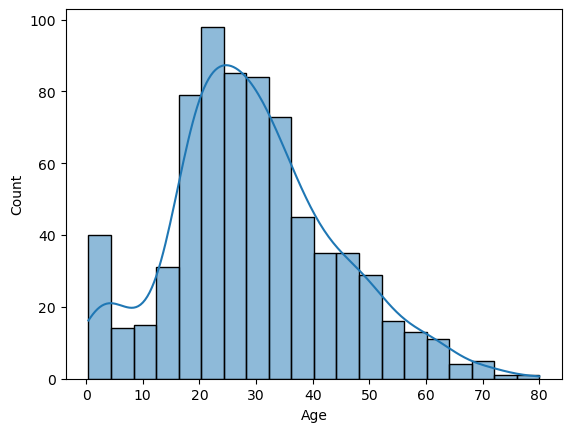

In [5]:
sns.histplot(train['Age'],kde=True)

In [6]:
train['Age']=train['Age'].fillna(train['Age'].mean())
train=train.drop('Cabin',axis=1)
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [7]:
print('Duplicates in training data',train.duplicated().sum())

Duplicates in training data 0


In [8]:
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test=test.drop('Cabin',axis=1)
test=test.dropna()
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
print('Duplicates in prediction data',test.duplicated().sum())

Duplicates in prediction data 0


## 💠Data Visualization

<Axes: xlabel='Survived', ylabel='count'>

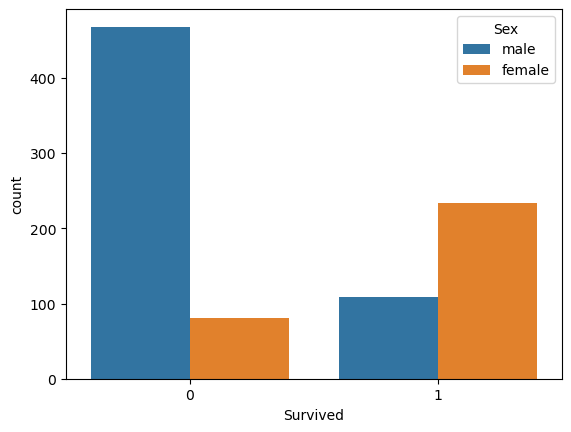

In [12]:
sns.countplot(train,x='Survived',hue='Sex')               # Survival rate of females is greater than males survival rate 

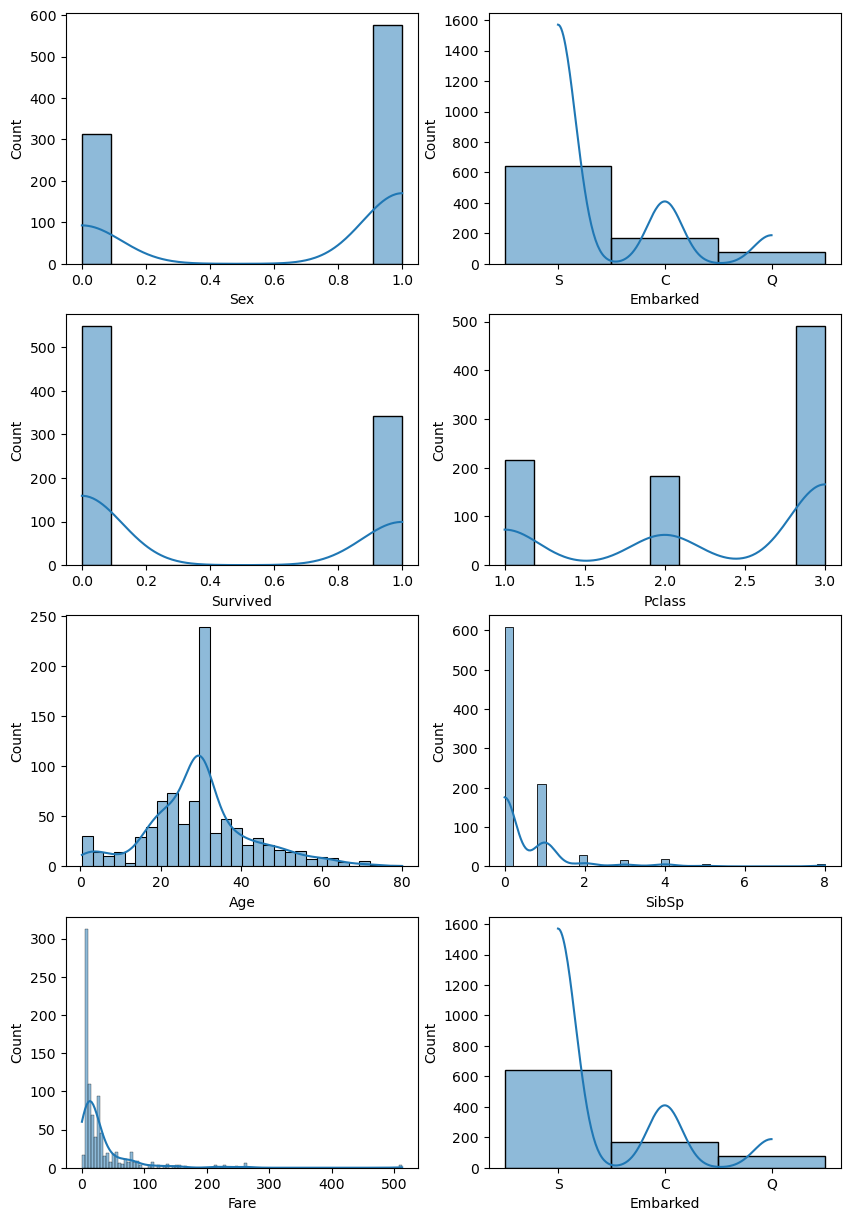

In [35]:
plt.figure(figsize=(10,15))
for i,j in enumerate(['Sex','Embarked','Survived', 'Pclass','Age', 'SibSp','Fare', 'Embarked']):
    plt.subplot(4,2,i+1)
    sns.histplot(train[j],kde=True)
    plt.plot()

## 💠Data Preprocessing

In [39]:
train['Sex']=train['Sex'].replace(['male','female'],[1,0])
test['Sex']=train['Sex'].replace(['male','female'],[1,0])

Scale=MinMaxScaler()
train['Age']=Scale.fit_transform(pd.DataFrame(train['Age']))
test['Age']=Scale.fit_transform(pd.DataFrame(test['Age']))

In [41]:
X=train[['Sex','Age','SibSp','Parch']]
Y=train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((712, 4), (712,))
▶Shape of X_test,y_test ((179, 4), (179,))


## 💠LogisticRegression

In [42]:
Reg_model=LogisticRegression(max_iter=100,penalty='l2',solver='saga')
Reg_model.fit(X_train,y_train)

y_pred=Reg_model.predict(X_test)
Y_pred=Reg_model.predict(X_train)

print('Accuracy on training data ',accuracy_score(y_train,Y_pred))
print('Accuracy on testing data  ',accuracy_score(y_test,y_pred))

Accuracy on training data  0.7921348314606742
Accuracy on testing data   0.7877094972067039


<Axes: >

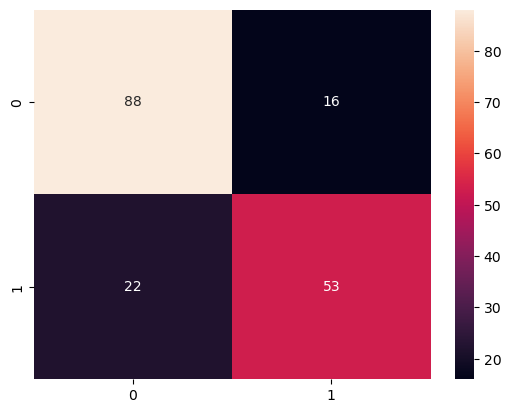

In [43]:
CM=confusion_matrix(y_test,y_pred)
sns.heatmap(CM,annot=True)

In [49]:
y_test_pred=Reg_model.predict(test[['Sex','Age','SibSp','Parch']])
test['Pred_Survived']=y_test_pred

test.head()

PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    1   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2          894       2                     Myles, Mr. Thomas Francis    0   
3          895       3                              Wirz, Mr. Albert    0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   

        Age  SibSp  Parch   Ticket     Fare Embarked  Pred_Survived  
0  0.452723      0      0   330911   7.8292        Q              0  
1  0.617566      1      0   363272   7.0000        S              1  
2  0.815377      0      0   240276   9.6875        Q              1  
3  0.353818      0      0   315154   8.6625        S              1  
4  0.287881      1      1  3101298  12.2875        S              0

In [51]:
coefficients = pd.DataFrame(Reg_model.coef_[0], index=X.columns, columns=['Coefficient'])
print('The features which are the most significant are [Sex, Age]')
coefficients

The features which are the most significant are [Sex, Age]


Coefficient
Sex      -2.542232
Age      -0.739096
SibSp    -0.265677
Parch    -0.062117

In [58]:
from pickle import dump
dump(Reg_model,open('Reg_model.pkl','wb'))
dump(Scale,open('Scale.pkl','wb'))

## 💠Interview Questions:
### 1. What is the difference between precision and recall?
Precision and recall are metrics that measure the performance of machine learning models. The main difference between them is that precision measures the quality of a model's positive predictions, while recall measures the quantity of relevant results it returns:
##### Precision
The ratio of true positives to total positive predictions. Precision is a measure of quality, and higher precision means that a model returns more relevant results than irrelevant ones.
##### Recall
The ratio of true positives to total actual (relevant) objects. Recall is a measure of quantity, and higher recall means that a model returns most of the relevant results. 

### 2. What is cross-validation, and why is it important in binary classification?
Cross validation is a technique used in machine learning to evaluate the performance of a model on unseen data. It involves dividing the available data into multiple folds or subsets, using one of these folds as a validation set, and training the model on the remaining folds. This process is repeated multiple times, each time using a different fold as the validation set. Finally, the results from each validation step are averaged to produce a more robust estimate of the model’s performance. Cross validation is an important step in the machine learning process and helps to ensure that the model selected for deployment is robust and generalizes well to new data.
The main purpose of cross validation is to prevent overfitting, which occurs when a model is trained too well on the training data and performs poorly on new, unseen data. By evaluating the model on multiple validation sets, cross validation provides a more realistic estimate of the model’s generalization performance, i.e., its ability to perform well on new, unseen data.
